## Jupyter notebook for computing correlations between compartment replicates across time
This notebook is the code for computing the correlations between replicates of the compartments data from the time course Hi-C used in the paper **"Simultaneous analysis of open chromatin, promoter interactions and gene expression in stimulated T cells implicates causal genes for rheumatoid arthritis"** by Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre. 

Author : *Jing Yang*  <br />
Date: 24-10-2019 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

### load packages

In [1]:
library(ggplot2)


### load data for both replicates

In [2]:
T0_rep1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T0_rep1_40x80kb.PC1.txt', header=F, row.names=1)
T20_rep1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T20_rep1_40x80kb.PC1.txt', header=F, row.names=1)
T1H_rep1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T1H_rep1_40x80kb.PC1.txt', header=F, row.names=1)
T4H_rep1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T4H_rep1_40x80kb.PC1.txt', header=F, row.names=1)

In [3]:
T0_rep2 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T0_rep2_40x80kb.PC1.txt', header=F, row.names=1)
T20_rep2 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T20_rep2_40x80kb.PC1.txt', header=F, row.names=1)
T1H_rep2 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T1H_rep2_40x80kb.PC1.txt', header=F, row.names=1)
T4H_rep2 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T4H_rep2_40x80kb.PC1.txt', header=F, row.names=1)

In [4]:
names(T0_rep1) <- c('chr','start','end','strand','T01')
names(T0_rep2) <- c('chr','start','end','strand','T02')
names(T20_rep1) <- c('chr','start','end','strand','T201')
names(T20_rep2) <- c('chr','start','end','strand','T202')
names(T1H_rep1) <- c('chr','start','end','strand','T1H1')
names(T1H_rep2) <- c('chr','start','end','strand','T1H2')
names(T4H_rep1) <- c('chr','start','end','strand','T4H1')
names(T4H_rep2) <- c('chr','start','end','strand','T4H2')

### calculate the correlations

In [5]:
data_T0 <- merge(T0_rep1, T0_rep2)
data_T20 <- merge(T20_rep1, T20_rep2)
data_T1H <- merge(T1H_rep1, T1H_rep2)
data_T4H <- merge(T4H_rep1, T4H_rep2)


In [6]:

data <- merge(merge(merge(data_T0, data_T20),data_T1H), data_T4H)
data_sorted <- data[with(data, order(chr, start)),]

In [7]:
corr0 <- c( cor(data_sorted$T01, data_sorted$T02), cor(data_sorted$T201, data_sorted$T202),
            cor(data_sorted$T1H1, data_sorted$T1H2), cor(data_sorted$T4H1, data_sorted$T4H2))
corr20 <- c( cor(data_sorted$T01, data_sorted$T202), cor(data_sorted$T201, data_sorted$T02),
            cor(data_sorted$T01, data_sorted$T201), cor(data_sorted$T202, data_sorted$T02))
corr40 <- c( cor(data_sorted$T1H1, data_sorted$T202), cor(data_sorted$T201, data_sorted$T1H2),
            cor(data_sorted$T1H1, data_sorted$T201), cor(data_sorted$T202, data_sorted$T1H2))
corr60 <- c( cor(data_sorted$T01, data_sorted$T1H2), cor(data_sorted$T02, data_sorted$T1H2),            
            cor(data_sorted$T01, data_sorted$T1H1), cor(data_sorted$T02, data_sorted$T1H1))
corr220 <- c( cor(data_sorted$T201, data_sorted$T4H2), cor(data_sorted$T202, data_sorted$T4H2),
            cor(data_sorted$T201, data_sorted$T4H1), cor(data_sorted$T201, data_sorted$T4H1))
corr180 <- c( cor(data_sorted$T1H1, data_sorted$T4H2), cor(data_sorted$T1H2, data_sorted$T4H2),
            cor(data_sorted$T1H1, data_sorted$T4H1), cor(data_sorted$T1H1, data_sorted$T4H1))
corr240 <- c( cor(data_sorted$T01, data_sorted$T4H2), cor(data_sorted$T02, data_sorted$T4H2),
            cor(data_sorted$T01, data_sorted$T4H1), cor(data_sorted$T01, data_sorted$T4H1))


### plot the results

In [8]:
times1 <- rep(c(0,20,40,60,180,220,240), each=4)

In [9]:
data_forplot <- data.frame(x=times1, y=c(corr0, corr20, corr40, corr60, corr180, corr220, corr240))

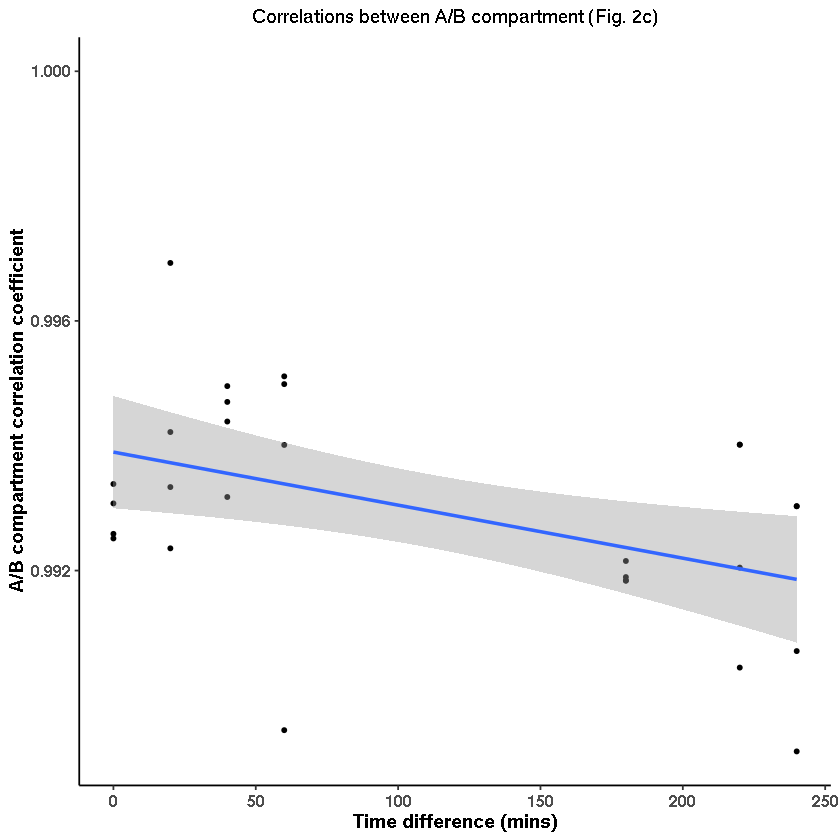

In [10]:
ggplot(data_forplot, aes(x=x, y=y)) + geom_point(size=1) + geom_smooth(method="glm") +
xlab('Time difference (mins)') + ylab('A/B compartment correlation coefficient') + 
ggtitle('Correlations between A/B compartment (Fig. 2c)') +
scale_y_continuous(limits=c(NA,1))+
theme(
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  panel.background = element_blank(),
  plot.title = element_text(hjust=0.5),
  legend.title=element_blank(),
  axis.title=element_text(size=12,face="bold", hjust=0.5),
  axis.text.x = element_text(hjust = 0.5, vjust=0.5, size=10, face="bold"),
  axis.text.y = element_text(size=10, face="bold"),
  axis.line = element_line(colour = "black"))  
